In [7]:
import localgraphclustering as lgc
import numpy as np

import matplotlib.pyplot as plt


import sys, traceback
import os
sys.path.insert(0, os.path.join("..", "LocalGraphClustering", "notebooks"))
import helper
import pickle
np.random.seed(seed=123)

In [8]:
helper.lgc_graphlist

['senate',
 'Erdos02',
 'JohnsHopkins',
 'Colgate88',
 'usroads',
 'ppi_mips',
 'ASTRAL',
 'sfld',
 'find_V',
 'ppi-homo',
 'neuro-fmri-01',
 'ca-GrQc',
 'dolphins',
 'disconnected']

In [9]:
def run_improve(g, gname, method, methodname, delta, nthreads=12, timeout=1000):
    ratio = 1.0
    if g._num_vertices > 1000000:
        ratio = 0.05
    elif g._num_vertices > 100000:
        ratio = 0.1    
    elif g._num_vertices > 10000:
        ratio = 0.4        
    elif g._num_vertices > 7500:
        ratio = 0.6
    elif g._num_vertices > 5000:
        ratio = 0.8
    print("ratio: ", ratio)
    ncp = lgc.NCPData(g,store_output_clusters=True)
    ncp.approxPageRank(ratio=ratio,nthreads=nthreads,localmins=False,neighborhoods=False,random_neighborhoods=False)
    sets = [st["output_cluster"] for st in ncp.results]
    print("Make an NCP object for Improve Algo")
    ncp2 = lgc.NCPData(g)
    print("Going into improve mode")
    try:
        output = ncp2.refine(sets, method=method, methodname=methodname, nthreads=nthreads, timeout=timeout, **{"delta": delta})
    except Exception as E:
        print("Exception in user code:")
        print('-'*60)
        traceback.print_exc(file=sys.stdout)
        print('-'*60)
    fig = lgc.NCPPlots(ncp2).mqi_input_output_cond_plot()[0]
    fig.axes[0].set_title(gname + " " + methodname+"-NCP")
    fig.savefig("figures/" + method + "-ncp-"+gname+".pdf", bbox_inches="tight", figsize=(100,100))
    plt.show()
    pickle.dump(ncp, open('results/' + method + "-ncp-" + gname + '.pickle', 'wb'))
    pickle.dump(ncp2, open('results/' + method + "-ncp2-" + gname + '.pickle', 'wb'))

ratio:  0.6
There are  1  connected components in the graph
approxPageRank:ncpapr_acl:  186.5 random_node rho=1.0e-05
approxPageRank:ncpapr_acl:  194.6 random_node rho=1.0e-04
approxPageRank:ncpapr_acl:  194.9 random_neighborhood rho=1.0e-05
approxPageRank:ncpapr_acl:  195.1 random_neighborhood rho=1.0e-04
Make an NCP object for Improve Algo
There are  1  connected components in the graph
Going into improve mode


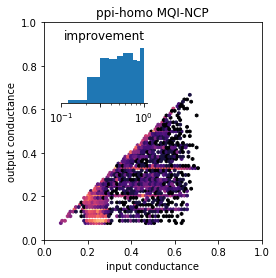

In [10]:
## This is a test

for gname in ["ppi-homo"]:
    g = helper.lgc_data(gname)
    g.discard_weights()
    run_improve(g, gname=gname, method="mqi", methodname="MQI", delta=0.3, timeout=100000000)

## Generate improve plots for MQI

Name:  senate
ratio:  5e-05
There are  1  connected components in the graph
Make an NCP object for Improve Algo
There are  1  connected components in the graph
Going into improve mode


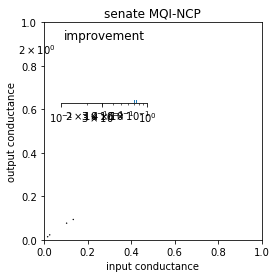

Name:  Erdos02
ratio:  5e-05
There are  1  connected components in the graph
Make an NCP object for Improve Algo
There are  1  connected components in the graph
Going into improve mode


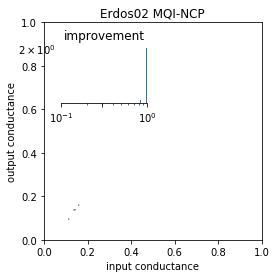

Name:  JohnsHopkins
ratio:  5e-05
There are  24  connected components in the graph


/usr/local/lib/python3.7/site-packages/localgraphclustering/GraphLocal.py:552: UserWarning:

The graph has multiple (24) components, using the largest with 5157 / 5180 nodes



Make an NCP object for Improve Algo
There are  24  connected components in the graph
Going into improve mode


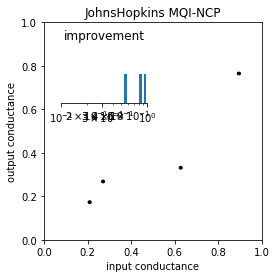

Name:  Colgate88


/usr/local/lib/python3.7/site-packages/localgraphclustering/GraphLocal.py:217: UserWarning:

Loading a graphml is not efficient, we suggest using an edgelist format for this API.



ratio:  5e-05
There are  1  connected components in the graph
Make an NCP object for Improve Algo
There are  1  connected components in the graph
Going into improve mode


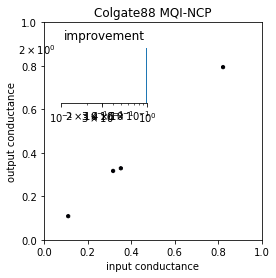

Name:  usroads
ratio:  5e-05
There are  1  connected components in the graph
Make an NCP object for Improve Algo
There are  1  connected components in the graph
Going into improve mode


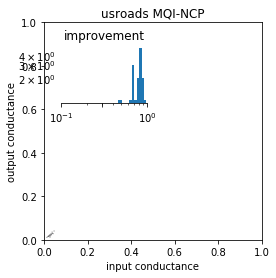

Name:  ppi_mips
ratio:  5e-05
There are  1  connected components in the graph
Make an NCP object for Improve Algo
There are  1  connected components in the graph
Going into improve mode


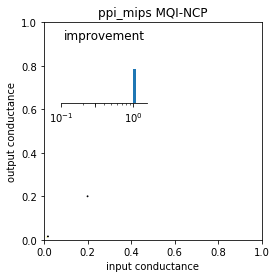

Name:  ASTRAL
ratio:  5e-05
There are  1  connected components in the graph
Make an NCP object for Improve Algo
There are  1  connected components in the graph
Going into improve mode


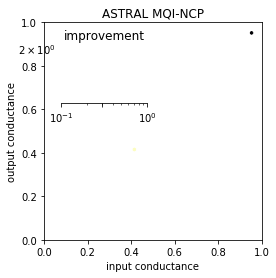

Name:  sfld
ratio:  5e-05
There are  1  connected components in the graph
Make an NCP object for Improve Algo
There are  1  connected components in the graph
Going into improve mode


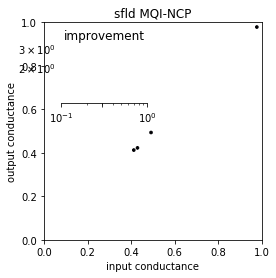

Name:  find_V
ratio:  5e-05
There are  1  connected components in the graph
Make an NCP object for Improve Algo
There are  1  connected components in the graph
Going into improve mode


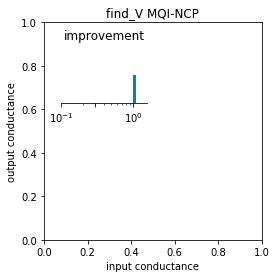

Name:  ppi-homo
ratio:  5e-05
There are  1  connected components in the graph
Make an NCP object for Improve Algo
There are  1  connected components in the graph
Going into improve mode


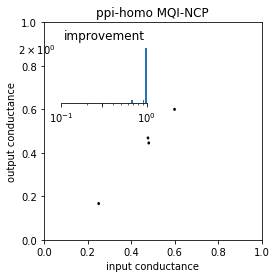

Name:  neuro-fmri-01
ratio:  5e-05
There are  738  connected components in the graph


/usr/local/lib/python3.7/site-packages/localgraphclustering/GraphLocal.py:552: UserWarning:

The graph has multiple (738) components, using the largest with 5725 / 6476 nodes



Make an NCP object for Improve Algo
There are  738  connected components in the graph
Going into improve mode


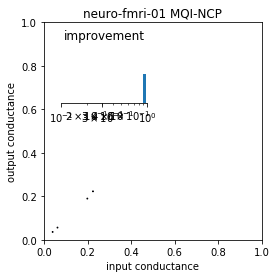

Name:  ca-GrQc
ratio:  5e-05
There are  1  connected components in the graph
Make an NCP object for Improve Algo
There are  1  connected components in the graph
Going into improve mode


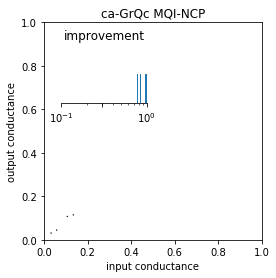

Name:  dolphins
ratio:  5e-05
There are  1  connected components in the graph
Make an NCP object for Improve Algo
There are  1  connected components in the graph
Going into improve mode


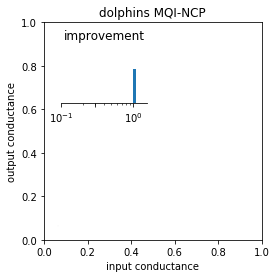

Name:  disconnected
ratio:  5e-05
There are  2  connected components in the graph
Make an NCP object for Improve Algo
There are  2  connected components in the graph
Going into improve mode


/usr/local/lib/python3.7/site-packages/localgraphclustering/GraphLocal.py:552: UserWarning:

The graph has multiple (2) components, using the largest with 4 / 8 nodes



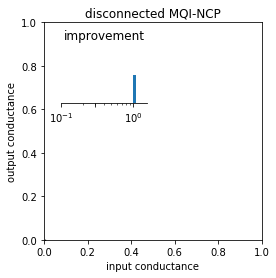

In [5]:
for gname in helper.lgc_graphlist:
    print("Name: ", gname)
    g = helper.lgc_data(gname)
    g.discard_weights()
    run_improve(g, gname=gname, method="mqi", methodname="MQI", delta=0.3, timeout=100000000)

## Generate improve plots for MQI for large-scale datasets

pokec /Users/kimonfountoulakis/Downloads/soc-pokec-relationships.edgelist
ratio:  0.05
There are  2  connected components in the graph
approxPageRank:ncpapr_acl:  502.4 random_node rho=1.0e-05
approxPageRank:ncpapr_acl: 1004.6 random_node rho=1.0e-04
approxPageRank:ncpapr_acl: 1006.9 random_neighborhood rho=1.0e-05
approxPageRank:ncpapr_acl: 1008.7 random_neighborhood rho=1.0e-04
Make an NCP object for Improve Algo
There are  2  connected components in the graph
Going into improve mode


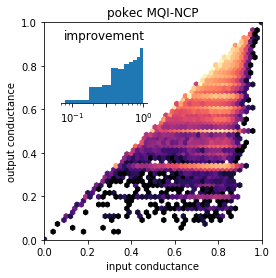

In [11]:
mygraphs = {#'orkut':'/Users/kimonfountoulakis/Downloads/com-orkut.ungraph.edgelist',
            'pokec':'/Users/kimonfountoulakis/Downloads/soc-pokec-relationships.edgelist'
            #'livejournal':'/Users/kimonfountoulakis/Downloads/soc-LiveJournal1.edgelist',
            #'email-Enron':'/Users/kimonfountoulakis/Downloads/Email-Enron.edgelist'
           }

for (gname,gfile) in mygraphs.items():
    print(gname, gfile)
    sep = ' '
    if isinstance(gfile, tuple):
        sep = gfile[1]
        gfile = gfile[0]
    g = lgc.GraphLocal(os.path.join("..", "data", gfile),'edgelist', "	")
    g.discard_weights()
    run_improve(g, gname=gname, method="mqi", methodname="MQI", delta=100, timeout=100000000)

In [ ]:
## This is a test for SimpleLocal

for gname in ["ppi-homo"]:
    g = helper.lgc_data(gname)
    g.discard_weights()
    run_improve(g, gname=gname, method="sl", methodname="SimpleLocal", delta=0.3, timeout=10)

## Generate improve plots for SimpleLocal with delta = 0.3

In [ ]:
for gname in helper.lgc_graphlist:
    print("Name: ", gname)
    g = helper.lgc_data(gname)
    g.discard_weights()
    run_improve(g, gname=gname, method="sl", methodname="SimpleLocal", delta=0.3, timeout=100000000)

## Generate improve plots for SimpleLocal for large-scale datasets with delta = 0.3

In [ ]:
mygraphs = {#'orkut':'/Users/kimonfountoulakis/Downloads/com-orkut.ungraph.edgelist',
            'pokec':'/Users/kimonfountoulakis/Downloads/soc-pokec-relationships.edgelist',
            'livejournal':'/Users/kimonfountoulakis/Downloads/soc-LiveJournal1.edgelist',
            'email-Enron':'/Users/kimonfountoulakis/Downloads/Email-Enron.edgelist'
           }

for (gname,gfile) in mygraphs.items():
    print(gname, gfile)
    sep = ' '
    if isinstance(gfile, tuple):
        sep = gfile[1]
        gfile = gfile[0]
    g = lgc.GraphLocal(os.path.join("..", "data", gfile),'edgelist', "	")
    g.discard_weights()
    #run_improve(g, gname=gname, method="sl", methodname="SimpleLocal", delta=0.3, timeout=100000000)

## Generate improve plots for SimpleLocal with delta = 0.6

In [ ]:
for gname in helper.lgc_graphlist:
    print("Name: ", gname)
    g = helper.lgc_data(gname)
    g.discard_weights()
    run_improve(g, gname=gname, method="sl", methodname="SimpleLocal", delta=0.6, timeout=100000000)

## Generate improve plots for SimpleLocal for large-scale datasets with delta = 0.6

In [ ]:
mygraphs = {'orkut':'/Users/kimonfountoulakis/Downloads/com-orkut.ungraph.edgelist',
            'pokec':'/Users/kimonfountoulakis/Downloads/soc-pokec-relationships.edgelist',
            'livejournal':'/Users/kimonfountoulakis/Downloads/soc-LiveJournal1.edgelist',
            'email-Enron':'/Users/kimonfountoulakis/Downloads/Email-Enron.edgelist'
           }

for (gname,gfile) in mygraphs.items():
    print(gname, gfile)
    sep = ' '
    if isinstance(gfile, tuple):
        sep = gfile[1]
        gfile = gfile[0]
    g = lgc.GraphLocal(os.path.join("..", "data", gfile),'edgelist', "	")
    g.discard_weights()
    run_improve(g, gname=gname, method="sl", methodname="SimpleLocal", delta=0.6, timeout=100000000)

## Generate improve plots for SimpleLocal with delta = 0.9

In [ ]:
for gname in helper.lgc_graphlist:
    print("Name: ", gname)
    g = helper.lgc_data(gname)
    g.discard_weights()
    run_improve(g, gname=gname, method="sl", methodname="SimpleLocal", delta=0.9, timeout=100000000)

## Generate improve plots for SimpleLocal for large-scale datasets with delta = 0.9

In [ ]:
mygraphs = {'orkut':'/Users/kimonfountoulakis/Downloads/com-orkut.ungraph.edgelist',
            'pokec':'/Users/kimonfountoulakis/Downloads/soc-pokec-relationships.edgelist',
            'livejournal':'/Users/kimonfountoulakis/Downloads/soc-LiveJournal1.edgelist',
            'email-Enron':'/Users/kimonfountoulakis/Downloads/Email-Enron.edgelist'
           }

for (gname,gfile) in mygraphs.items():
    print(gname, gfile)
    sep = ' '
    if isinstance(gfile, tuple):
        sep = gfile[1]
        gfile = gfile[0]
    g = lgc.GraphLocal(os.path.join("..", "data", gfile),'edgelist', "	")
    g.discard_weights()
    #run_improve(g, gname=gname, method="sl", methodname="SimpleLocal", delta=0.9, timeout=100000000)